In [3]:
# Exponential Distribution: Estimate the probability that the next customer will arrive in 3 minutes

import pandas as pd
import numpy as np
from math import exp
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Datasets/orders.csv')
df.head(2)

,order_id,date,time
0,1,01/01/2015,11:38:36
1,2,01/01/2015,11:57:40


In [6]:
# Combine 'date' and 'time' into a single datetime column

df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], dayfirst = True)

In [7]:
# Sort by datetime

df = df.sort_values('datetime')

In [8]:
# Group by date and calculate intra-day interarrival times

df['date_only'] = df['datetime'].dt.date # To avoid overwriting original 'date' if needed

time_diffs = []

In [9]:
for _, group in df.groupby('date_only'):
    group = group.sort_values('datetime')
    diffs = group['datetime'].diff().dt.total_seconds().dropna() / 60 # in minutes
    time_diffs.extend(diffs.tolist())

In [10]:
# Convert to NumPy array

time_differences = np.array(time_diffs)

In [11]:
# Exponential distribution parameter

mean_diff = time_differences.mean()
rate_lambda = 1 / mean_diff

In [12]:
# Probability that next customer arrives after 3 minutes

t = 3 # minutes
prob_after_3_min = exp(-rate_lambda * t)

In [13]:
# Output

print(f"Average time between customers (intra-day only): {mean_diff:.2f} minutes")
print(f"λ (rate): {rate_lambda:.4f}")
print(f"Probability that next customer arrives AFTER {t} minutes: {prob_after_3_min:.4f}")

Average time between customers (intra-day only): 11.02 minutes
λ (rate): 0.0908
Probability that next customer arrives AFTER 3 minutes: 0.7616


In [14]:
# Calculate PDF and CDF from 0 to 20 minutes

# Create time values: [0, 1, ...., 19] (20 values total)

x = np.linspace(0, 19, 20)

In [15]:
# Calculate PDF and CDF for exponential distribution

pdf = rate_lambda * np.exp(-rate_lambda * x)
cdf = 1 - np.exp(-rate_lambda * x)

In [16]:
# Create DataFrame for better tabular display

df_table = pd.DataFrame({
    'Minute': x.round(0),
    'PDF': pdf.round(6),
    'CDF': cdf.round(6)
})

In [17]:
print(df_table.to_string(index = False))

 Minute      PDF      CDF
    0.0 0.090782 0.000000
    1.0 0.082904 0.086784
    2.0 0.075709 0.166036
    3.0 0.069139 0.238410
    4.0 0.063139 0.304504
    5.0 0.057659 0.364861
    6.0 0.052655 0.419981
    7.0 0.048086 0.470317
    8.0 0.043913 0.516285
    9.0 0.040102 0.558263
   10.0 0.036622 0.596599
   11.0 0.033444 0.631607
   12.0 0.030541 0.663578
   13.0 0.027891 0.692774
   14.0 0.025470 0.719436
   15.0 0.023260 0.743784
   16.0 0.021241 0.766019
   17.0 0.019398 0.786325
   18.0 0.017714 0.804869
   19.0 0.016177 0.821803


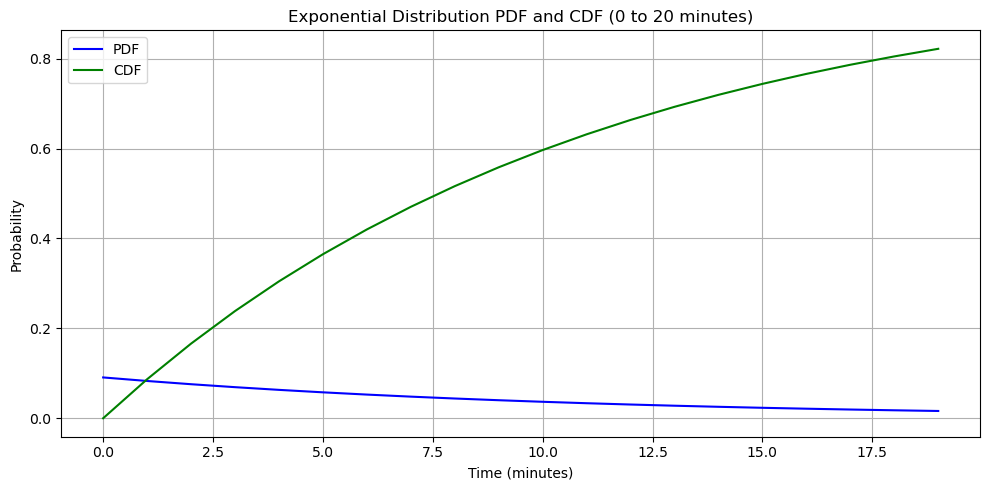

In [18]:
# Plot

plt.figure(figsize = (10, 5))
plt.plot(x, pdf, label = 'PDF', color = 'blue')
plt.plot(x, cdf, label = 'CDF', color = 'green')
plt.title('Exponential Distribution PDF and CDF (0 to 20 minutes)')
plt.xlabel('Time (minutes)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()